In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_51380_I')

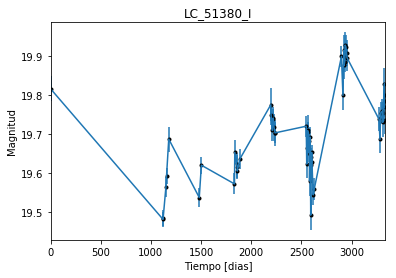

In [2]:
data = np.genfromtxt('LC_51380_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_51380_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

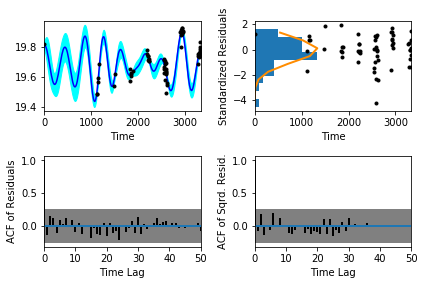

In [5]:
sample.assess_fit()

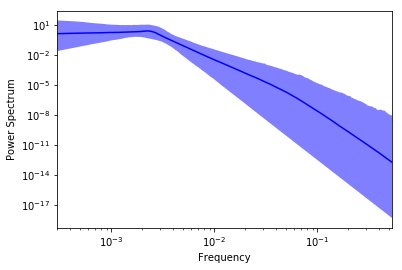

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_51380_I')

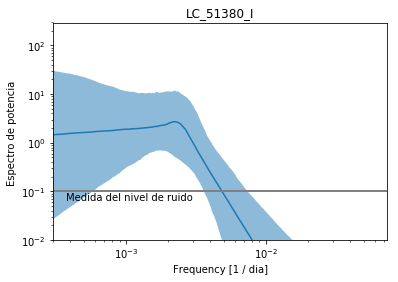

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_51380_I')

Text(0.5,1,'Prediccion , valor esperado LC_51380_I')

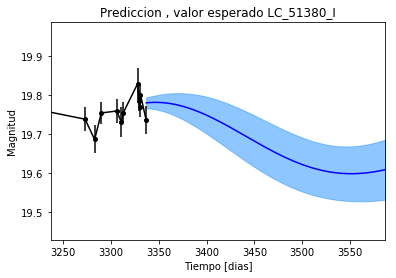

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_51380_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_51380_I')

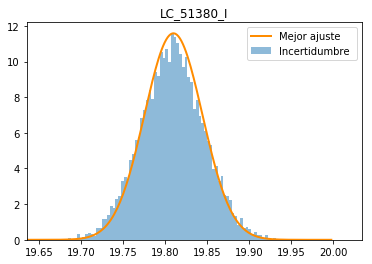

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_51380_I')

Text(0.5,1,'Interpolacion, camino simulado LC_51380_I')

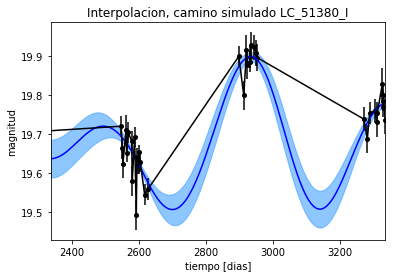

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51380_I')

Text(0.5,1,'Interpolacion, camino simulado LC_51380_I')

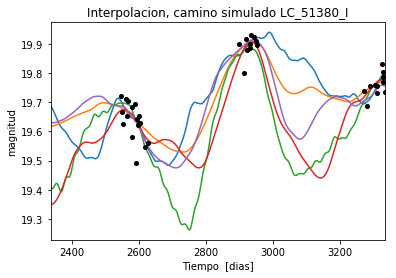

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51380_I')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 449.365596748
Median: 0.00175254514182
Standard deviation: 0.146196474686
68% credibility interval: [ 0.00044063  0.03605606]
95% credibility interval: [  3.16932301e-04   5.52066650e-01]
99% credibility interval: [  3.03088051e-04   9.70151208e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 661.325997584
Median: 0.00123738852033
Standard deviation: 0.0596717048466
68% credibility interval: [ 0.00042361  0.01085217]
95% credibility interval: [ 0.00031583  0.12070685]
99% credibility interval: [  3.02741795e-04   4.19362393e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 205.247879604
Median: 0.00541356732504
Standar

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 698.853184995
Median: 121.824519741
Standard deviation: 2.24844778545
68% credibility interval: [ 119.28641195  123.89225141]
95% credibility interval: [ 116.45251447  124.89367771]
99% credibility interval: [ 114.39945738  125.32133928]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 364.816106665
Median: 0.269926912156
Standard deviation: 1.82613284704
68% credibility interval: [ 0.03210583  2.44519249]
95% credibility interval: [ 0.01278898  6.3718208 ]
99% credibility interval: [  9.53046107e-03   9.58085662e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 331.372312139
Median: 0.0548247240435
Standard deviation: 7.45580696949
68% credibility interval: [  1.79066941e-03   1.83838227e+00]
95% credibility inter

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19580.1122806
Median: 1.85732069198e-15
Standard deviation: 4.14403916456e+73
68% credibility interval: [  2.61185339e-53   4.12784200e+33]
95% credibility interval: [  5.08728328e-88   2.08747731e+66]
99% credibility interval: [  1.22752572e-102   4.22810235e+070]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2228.76430725
Median: 19.6929042407
Standard deviation: 0.0523036396336
68% credibility interval: [ 19.64898638  19.7370831 ]
95% credibility interval: [ 19.59054877  19.80092012]
99% credibility interval: [ 19.53308917  19.87540724]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 337.469549811
Median: 0.00281643750261
Standard deviation: 0.203002156515
68% credibility interval: [ 0.00039336  0.14157277]
95% credibility interval: [ 0.          0.84680252]
99% credibility interval: [ 0.          1.01203228]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 337.469549811
Median: 0.00281643750261
Standard deviation: 0.203002156515
68% credibility interval: [ 0.00039336  0.14157277]
95% credibility interval: [ 0.          0.84680252]
99% credibility interval: [ 0.          1.01203228]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 312.296093548
Median: 0.0
Standard deviation: 0.00111188331775
68% c

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 698.853184995
Median: 121.824519741
Standard deviation: 2.24844778545
68% credibility interval: [ 119.28641195  123.89225141]
95% credibility interval: [ 116.45251447  124.89367771]
99% credibility interval: [ 114.39945738  125.32133928]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1682.50819874
Median: 0.0177728631872
Standard deviation: 0.0191886193578
68% credibility interval: [ 0.0108961   0.03197478]
95% credibility interval: [ 0.00739607  0.06941948]
99% credibility interval: [ 0.00578225  0.12402302]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1245.8308484
Median: 1.19153426572
Standard deviation: 0.18320524958
68% credibility interval: [ 1.03725816  1.38842592]
95% credibility interval: [ 0.89635074  1.61826183]
99% credibility interval: [ 0.81453617  1.78260899]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1478.20516198
Median: 1.04278992171e-05
Standard deviation: 0.0534788814517
68% credibility interval: [  4.14514716e-38   6.21520840e-04]
95% credibility interval: [  4.62494370e-72   9.88254883e-03]
99% credibility interval: [  3.17835509e-76   4.84895671e-02]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 449.365596748
Median: (-0.0110115658852-0.0118765391026j)
Standard deviation: 1.57184256553
68% credibility interval: [-0.22654692-6.53674016j -0.00276859-0.01715914j]
95% credibility interval: [ -3.46873706e+00-3.55262067j  -1.99134438e-03-0.01695806j]
99% credibility interval: [ -6.09563981e+00+0.j          -1.90435839e-03-0.02015528j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 661.325997584
Median: (-0.00777474137023+0.0116059290681j)
Standard deviation: 1.32946303667
68% credibility interval: [-0.06818620+0.13058644j -0.00266162+0.01137572j]
95% credibility interval: [-0.75842353+5.38036505j -0.00198442+0.01254366j]
99% credibility interval: [ -2.63493163e+00+0.68379298j  -1.90218280e-03+0.01596226j]
Posterior